<a href="https://colab.research.google.com/github/syedmoazzam786/Books-Python/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [77]:
#reading the data

train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [78]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [79]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [80]:
train.shape

(31647, 18)

In [81]:
test.shape

(4399, 11)

In [82]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [83]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [84]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [85]:
#reading the data
train= pd.read_csv("/content/drive/MyDrive/dataset/train (1).csv")

In [86]:
train["subscribed"].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [87]:
train["subscribed"].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

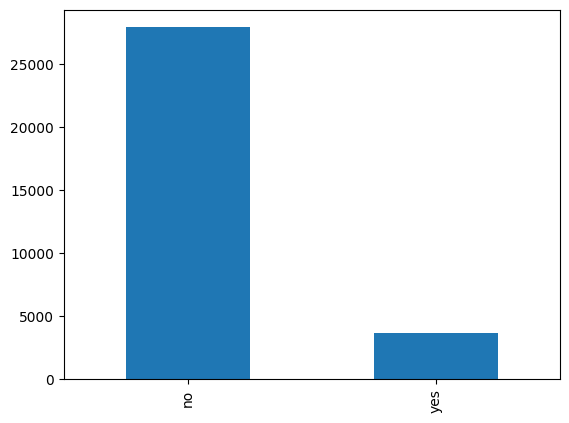

In [88]:
train["subscribed"].value_counts().plot.bar()

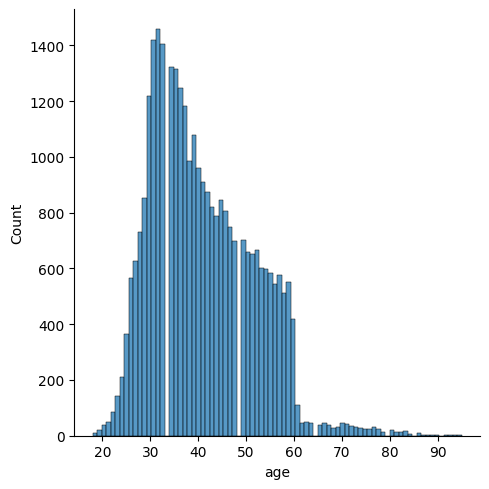

In [89]:
sn.displot(train["age"])

<Axes: >

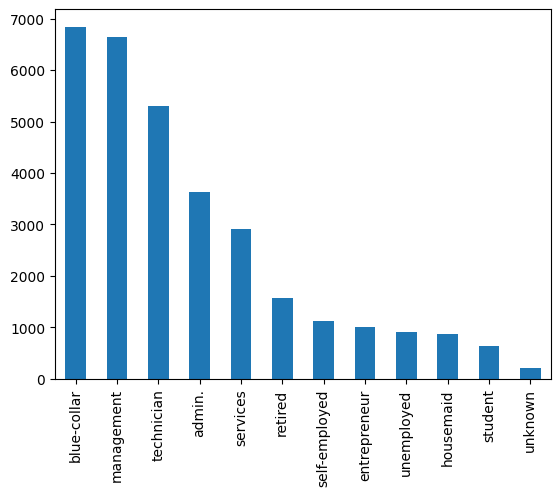

In [90]:
train['job'].value_counts().plot.bar()

<Axes: >

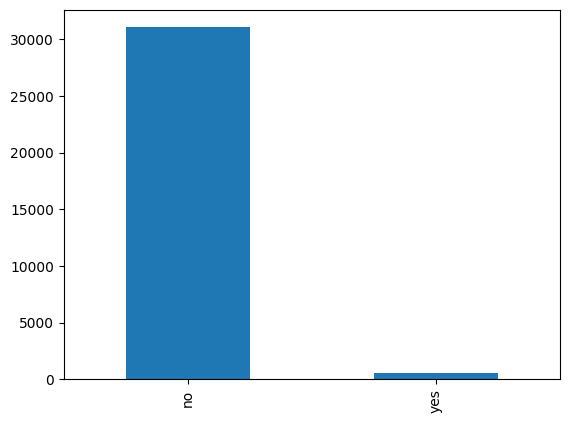

In [91]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

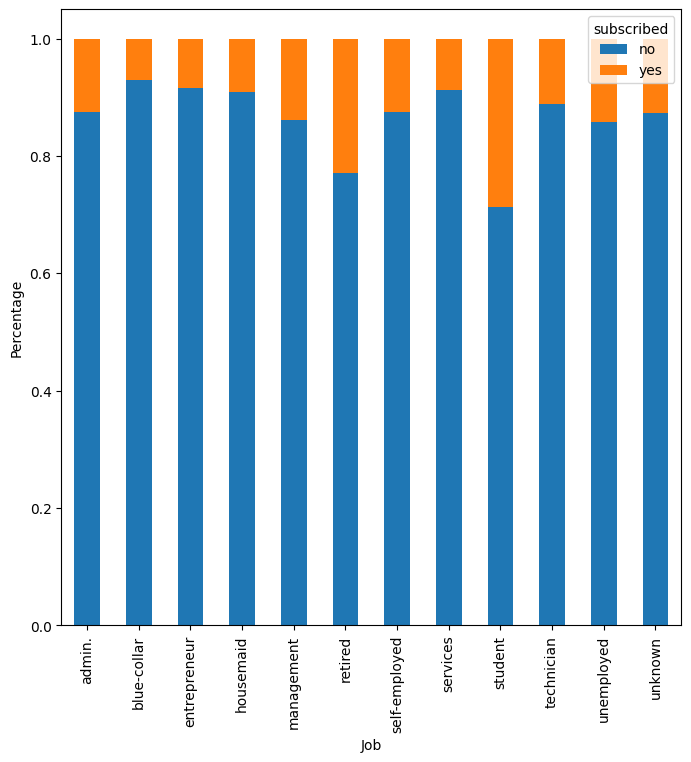

In [92]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

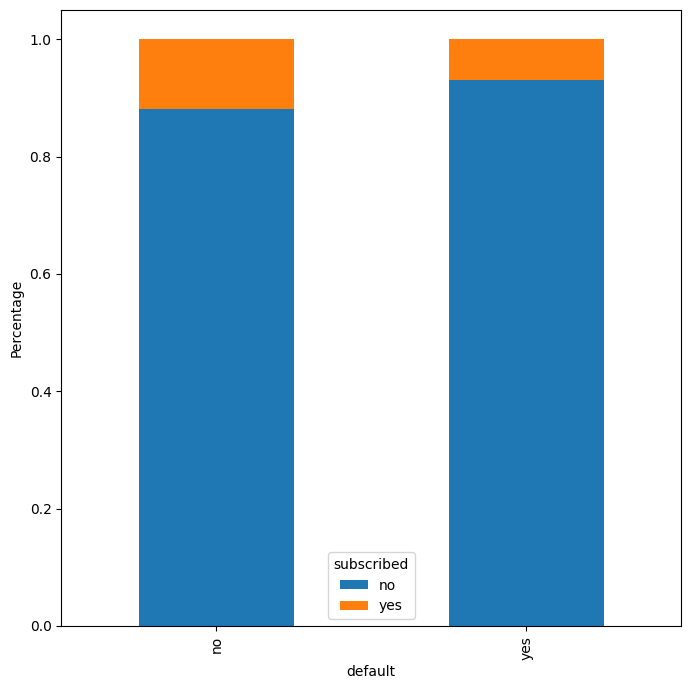

In [93]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [94]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<Axes: >

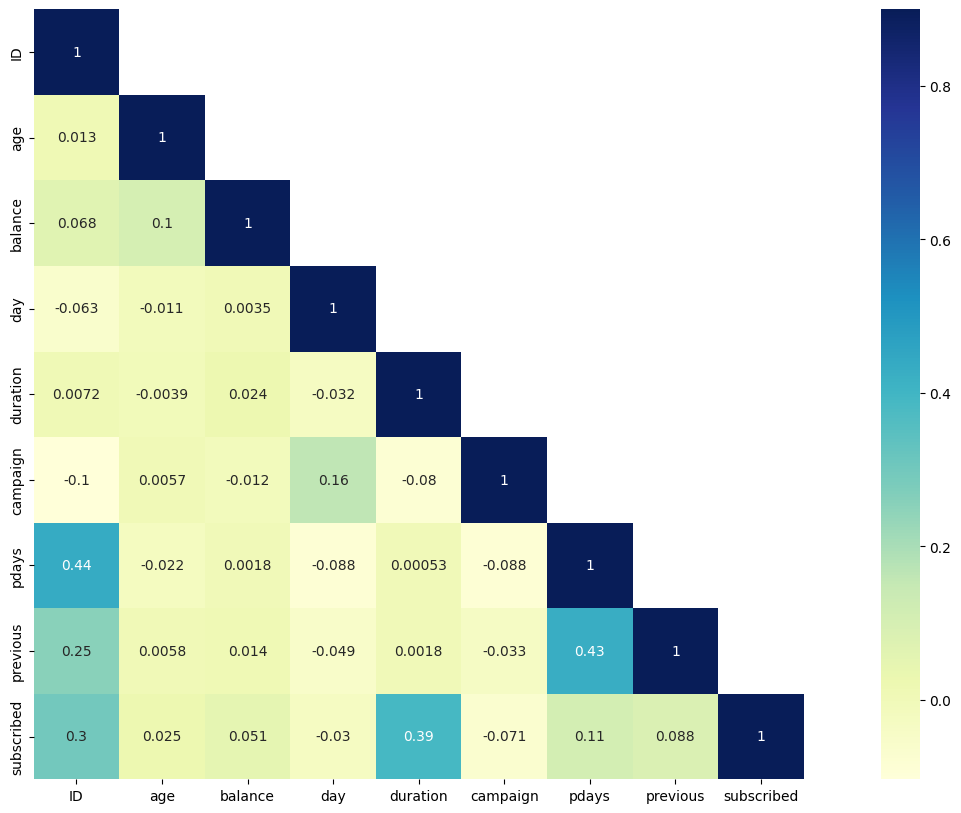

In [95]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [96]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [97]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [98]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
# defining the logistic regression model
lreg = LogisticRegression()

In [103]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [104]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [105]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8908372827804107

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [110]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [111]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [112]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

In [113]:
test = pd.get_dummies(test)

In [115]:
submission = pd.DataFrame()

In [118]:
submission.to_csv('submission.csv', header=True, index=False)